# Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import randint
from sklearn.model_selection import cross_val_score , GridSearchCV, RandomizedSearchCV
from IPython.display import Image
import pydotplus
from sklearn import tree

%matplotlib inline

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

# Data preprocessing

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Drop unnecessary collumns
data =data.drop(['RowNumber','CustomerId','Surname'],axis=1) 

In [5]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Correlation 

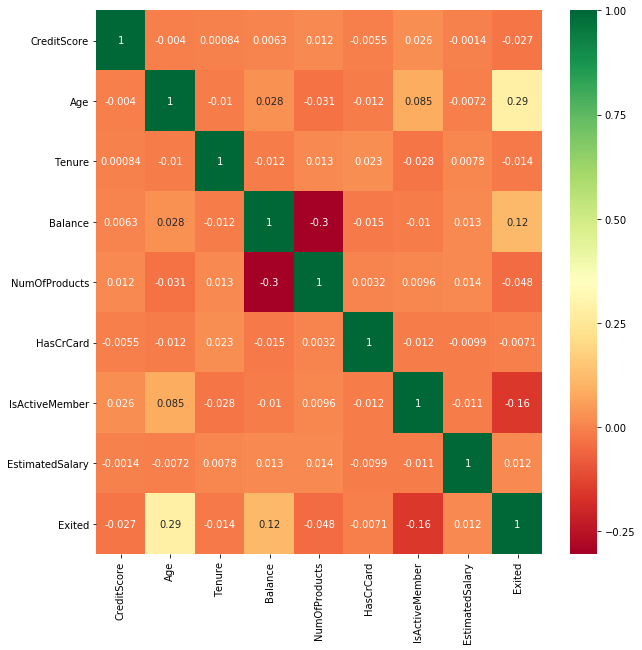

In [6]:
corrmat = data.corr() # Find Corr
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Spilit data**

In [7]:
X = data.drop('Exited',axis=1).values
y = data['Exited'].values

**We need to encode data which are not numerical**

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [9]:
lb_make = LabelEncoder()

In [10]:
X[:,1] = lb_make.fit_transform(X[:,1])
X[:,2] = lb_make.fit_transform(X[:,2])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Scale data**

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Necessary Function**

In [14]:
# For model evolution
def model_evalution(y_test, y_pred):
    print("Confusion Matrix : \n",confusion_matrix(y_test, y_pred))
    print("\nAccuracy Score : ",accuracy_score(y_test,y_pred),'\n')
    print("Classification Report : \n",classification_report(y_test, y_pred))
   

In [15]:
# create heatmap for confusion matrix
def heatmap_cm(confusion_matrix):
    sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [16]:
# Grid search for finding best parameters for model
def grid_search(x,y,classifier,parameter,cv):
    grid_sr = GridSearchCV(estimator=classifier,param_grid=parameter,cv=cv,scoring='accuracy',n_jobs=-1)
    grid_sr.fit(x,y)
    print('Grid search best accuracy score : ',grid_sr.best_score_)
    print('Grid search best parameter : ',grid_sr.best_params_)

In [17]:
# Randomized grid search

def random_grid_search(x,y,classifier,parameter,cv):
    grid_sr = RandomizedSearchCV(estimator=classifier,param_distributions=parameter,cv=cv,scoring='accuracy',n_jobs=-1)
    grid_sr.fit(x,y)
    print('Random Grid search best accuracy score : ',grid_sr.best_score_)
    print('Random Grid search best parameter : ',grid_sr.best_params_)
    

# Machine Learning Algorithm

The Target is the binary classification. So we need to use classifier.

In [18]:
def Model(X,y,algorithm,test):
    clf = algorithm.fit(X,y)
    pred = clf.predict(test)
    
    return clf, pred

**Logistic Regression**

In [19]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

In [20]:
classifier,y_pred = Model(X=X_train,y=y_train,algorithm=LogisticRegression(),test=X_test)

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
model_evalution(y_test, y_pred)

Confusion Matrix : 
 [[2583   74]
 [ 527  116]]

Accuracy Score :  0.8178787878787879 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.97      0.90      2657
           1       0.61      0.18      0.28       643

    accuracy                           0.82      3300
   macro avg       0.72      0.58      0.59      3300
weighted avg       0.79      0.82      0.78      3300



In [22]:
print("K-Fold Cross validation score : ",cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10).mean())


K-Fold Cross validation score :  0.80269245220969


C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

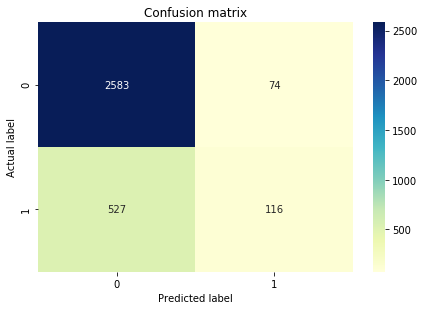

In [23]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,y_pred)))

* **Currectly classified : 2699**
* **Wrong classified : 601**

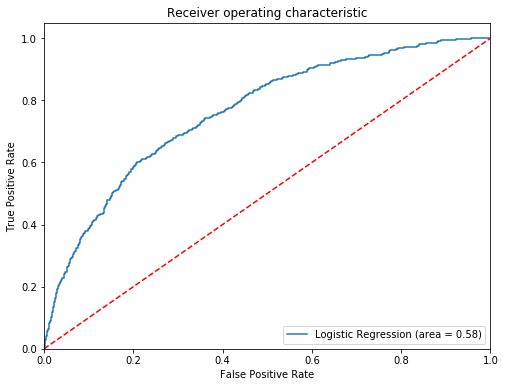

In [24]:
# Roc curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Improve model using Grid search**

In [25]:
param_log = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}

In [26]:
grid_search(x=X_train,y=y_train,classifier=classifier,parameter=param_log,cv=10)

Grid search best accuracy score :  0.8028358208955224
Grid search best parameter :  {'C': 1, 'penalty': 'l1'}


C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**The model accuracy are almost same as before .. So, our model is not improved**

**SVM**

In [27]:
# import SVM algorithm
from sklearn.svm import SVC

In [28]:
clf_svc,pred_svc = Model(X=X_train,y=y_train,algorithm=SVC(probability=True),test=X_test)

In [29]:
model_evalution(y_test, pred_svc)

Confusion Matrix : 
 [[2607   50]
 [ 386  257]]

Accuracy Score :  0.8678787878787879 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      2657
           1       0.84      0.40      0.54       643

    accuracy                           0.87      3300
   macro avg       0.85      0.69      0.73      3300
weighted avg       0.86      0.87      0.85      3300



In [30]:
print("K-Fold Cross validation score : ",cross_val_score(estimator=clf_svc,X=X_train,y=y_train,cv=10).mean())

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\N M Shihab Islam\Anaconda3\lib\site-p

K-Fold Cross validation score :  0.8514942719056604


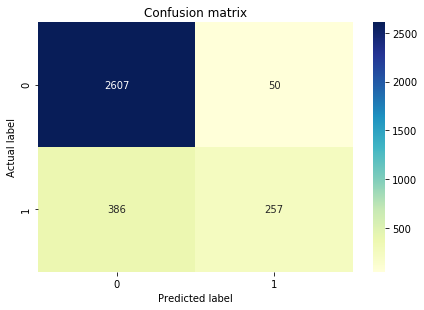

In [31]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,pred_svc)))

* **Currectly classified : 2864**
* **Wrong classified : 436**

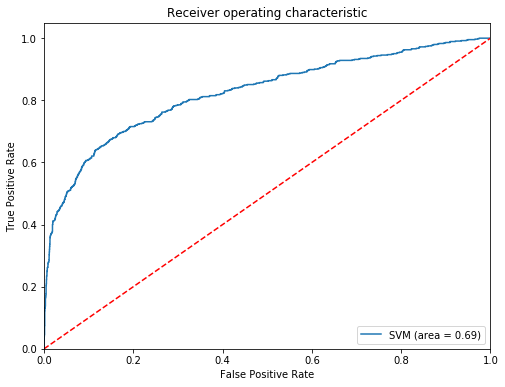

In [32]:
# Roc curve
logit_roc_auc = roc_auc_score(y_test, pred_svc)
fpr, tpr, thresholds = roc_curve(y_test, clf_svc.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

SVM has given better result, better accuracy and better curve than Logistic Regression

In [33]:
param_svc ={'kernel': ['linear', 'rbf', 'poly'],
            'C': [0.001, 0.10, 0.1, 10],
            'degree' : [0,3,6]}
            

In [34]:
grid_search(x=X_train,y=y_train,classifier=clf_svc,parameter=param_svc,cv=2)

Grid search best accuracy score :  0.8479104477611941
Grid search best parameter :  {'C': 10, 'degree': 3, 'kernel': 'poly'}


**The default model gives us better result**

**SGDClassifier**

In [35]:
from sklearn.linear_model import SGDClassifier 

In [36]:
clf_sgd,pred_sgd = Model(X= X_train,y=y_train,algorithm=SGDClassifier(loss= 'log'),test=X_test)

In [37]:
model_evalution(y_test,pred_sgd)

Confusion Matrix : 
 [[2525  132]
 [ 463  180]]

Accuracy Score :  0.8196969696969697 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      2657
           1       0.58      0.28      0.38       643

    accuracy                           0.82      3300
   macro avg       0.71      0.62      0.64      3300
weighted avg       0.79      0.82      0.79      3300



In [38]:
print("K-Fold Cross validation score : ",cross_val_score(estimator=clf_sgd,X=X_train,y=y_train,cv=10).mean())

K-Fold Cross validation score :  0.801792024287084


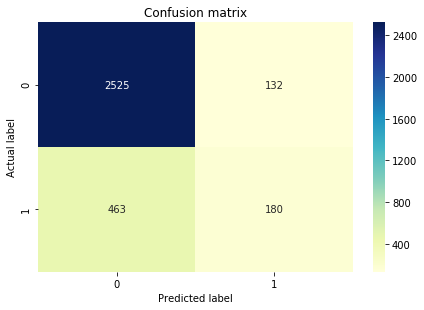

In [39]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,pred_sgd)))

* **Currectly classified : 2670**
* **Wrong classified : 630**

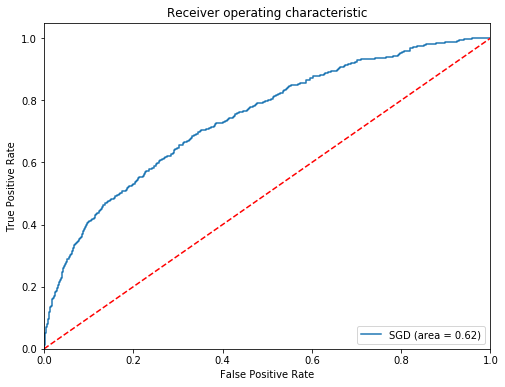

In [40]:
# Roc curve
logit_roc_auc = roc_auc_score(y_test, pred_sgd)
fpr, tpr, thresholds = roc_curve(y_test, clf_sgd.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='SGD (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [41]:
param_sgd= {
    'alpha': [.0001, .001, .01, .1, 1, 1.1, 1.2, 1.3], # learning rate
    'max_iter': [500,1000,1500,2000,2500], # number of epochs
    'loss': [ 'hinge', 'log', 'modified_huber','squared_hinge', 'perceptron','squared_epsilon_insensitive'],
    'penalty': ['none', 'l2', 'l1','elasticnet']
    
}

In [42]:
grid_search(x=X_train,y=y_train,classifier=clf_sgd,parameter=param_sgd,cv=10)

Grid search best accuracy score :  0.8095522388059702
Grid search best parameter :  {'alpha': 1.2, 'loss': 'modified_huber', 'max_iter': 2000, 'penalty': 'none'}


C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**The accuracy are too close and its a very low accuracy than other. Thats why I don't use updated model**

**Decision Tree**

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
clf_tree,pred_tree =Model(X= X_train,y=y_train,algorithm=DecisionTreeClassifier(),test=X_test)

In [45]:
model_evalution(y_test,pred_tree)

Confusion Matrix : 
 [[2258  399]
 [ 321  322]]

Accuracy Score :  0.7818181818181819 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      2657
           1       0.45      0.50      0.47       643

    accuracy                           0.78      3300
   macro avg       0.66      0.68      0.67      3300
weighted avg       0.79      0.78      0.79      3300



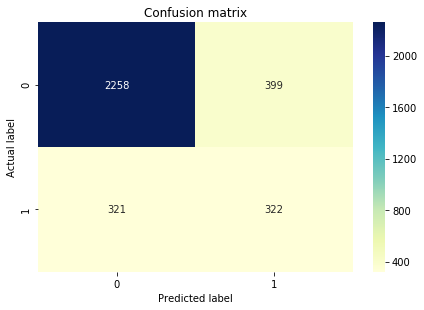

In [46]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,pred_tree)))

* **Currectly classified : 2584**
* **Wrong classified : 716**

In [47]:
print("K-Fold Cross validation score : ",cross_val_score(estimator=clf_tree,X=X_train,y=y_train,cv=10).mean())

K-Fold Cross validation score :  0.7847819725296051


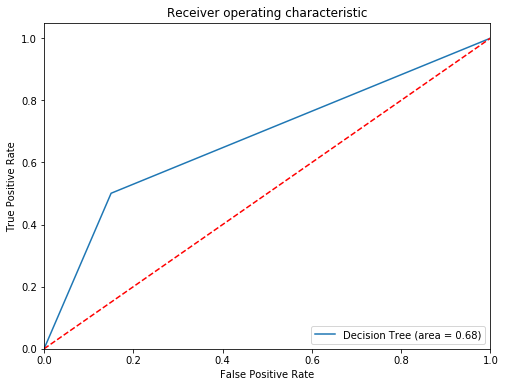

In [48]:
# Roc curve
logit_roc_auc = roc_auc_score(y_test, pred_tree)
fpr, tpr, thresholds = roc_curve(y_test, clf_tree.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [49]:
feature = ['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',]

In [50]:
target = 'Exited'

In [51]:
# This function will create pdf and png file of the model
def decision_tree_visualization(clf_tree,feature,target):
    dot_data = tree.export_graphviz(clf_tree,out_file=None,feature_names=feature,class_names=target)
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_pdf("data.pdf")
    graph.write_png("data.png")
    

In [52]:
#decision_tree_visualization(clf_tree,feature,target)

In [53]:
param_distree = {'criterion' : ['gini','entropy'],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
                 'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
                 'random_state':[123]
}

In [54]:
grid_search(x=X_train,y=y_train,classifier=clf_tree,parameter=param_distree,cv=10)

Grid search best accuracy score :  0.832089552238806
Grid search best parameter :  {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 15, 'random_state': 123}


In [55]:
random_grid_search(x=X_train,y=y_train,classifier=clf_tree,parameter=param_distree,cv=10)

Random Grid search best accuracy score :  0.825820895522388
Random Grid search best parameter :  {'random_state': 123, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'auto', 'criterion': 'entropy'}


**Grid search gives us better accuracy**

Lets try with best parameters and observe esult

In [56]:
clf_tree_1,pred_tree_1 =Model(X= X_train,y=y_train,
                              algorithm=DecisionTreeClassifier(random_state=123,min_samples_split=15,min_samples_leaf=6,
                                                               max_features='auto',criterion='gini')
                              ,test=X_test)

In [57]:
model_evalution(y_test,pred_tree_1)

Confusion Matrix : 
 [[2459  198]
 [ 373  270]]

Accuracy Score :  0.826969696969697 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      2657
           1       0.58      0.42      0.49       643

    accuracy                           0.83      3300
   macro avg       0.72      0.67      0.69      3300
weighted avg       0.81      0.83      0.82      3300



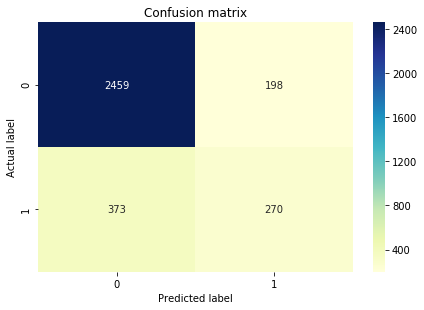

In [58]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,pred_tree_1)))

* **Currectly classified : 2729**
* **Wrong classified : 571**

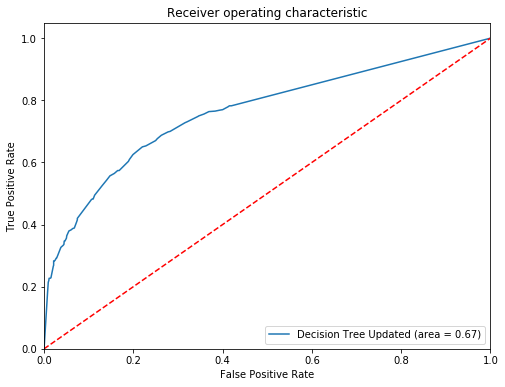

In [59]:
# Roc curve
logit_roc_auc = roc_auc_score(y_test, pred_tree_1)
fpr, tpr, thresholds = roc_curve(y_test, clf_tree_1.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Decision Tree Updated (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Random Forest**

In [60]:
from sklearn.ensemble import RandomForestClassifier 

In [61]:
clf_rf, pred_rf = Model(X= X_train,y=y_train,algorithm=RandomForestClassifier(),test=X_test)

C:\Users\N M Shihab Islam\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [62]:
model_evalution(y_test,pred_rf)

Confusion Matrix : 
 [[2537  120]
 [ 366  277]]

Accuracy Score :  0.8527272727272728 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      2657
           1       0.70      0.43      0.53       643

    accuracy                           0.85      3300
   macro avg       0.79      0.69      0.72      3300
weighted avg       0.84      0.85      0.84      3300



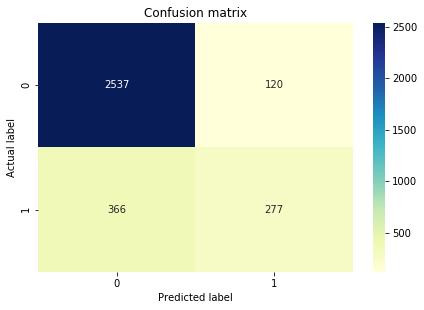

In [63]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,pred_rf)))

* **Currectly classified : 2823**
* **Wrong classified : 453**

In [64]:
print("K-Fold Cross validation score : ",cross_val_score(estimator=clf_rf,X=X_train,y=y_train,cv=10).mean())

K-Fold Cross validation score :  0.8471694726530414


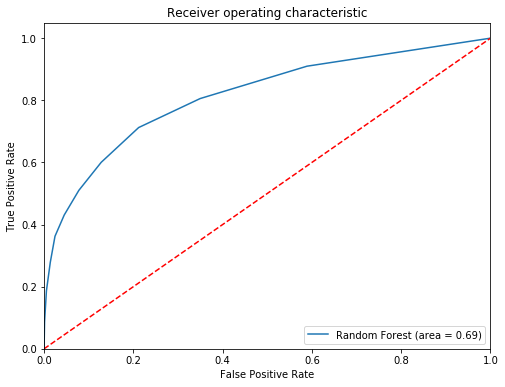

In [65]:
# Roc curve
logit_roc_auc = roc_auc_score(y_test, pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, clf_rf.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [66]:
param_rf ={'criterion' : ['gini','entropy'],'bootstrap': [True, False],
 'max_depth': [40, 50, 60, 70, 80, 90, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1,2,4,5],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [1000, 1200, 1400, 1600, 1800, 2000]}

In [67]:
random_grid_search(x=X_train,y=y_train,classifier=clf_rf,parameter=param_rf,cv=10)


Random Grid search best accuracy score :  0.8585074626865672
Random Grid search best parameter :  {'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 70, 'criterion': 'gini', 'bootstrap': True}


In [68]:
clf_rf_1,pred_rf_1 = Model(X=X_train,y=y_train,algorithm=RandomForestClassifier(n_estimators=2000,min_samples_split=2,
                                                                               min_samples_leaf=5,max_features='auto',
                                                                               max_depth = 60, criterion = 'entropy',
                                                                                bootstrap=False),test=X_test)

In [69]:
model_evalution(y_test,pred_rf_1)

Confusion Matrix : 
 [[2568   89]
 [ 338  305]]

Accuracy Score :  0.8706060606060606 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2657
           1       0.77      0.47      0.59       643

    accuracy                           0.87      3300
   macro avg       0.83      0.72      0.76      3300
weighted avg       0.86      0.87      0.86      3300



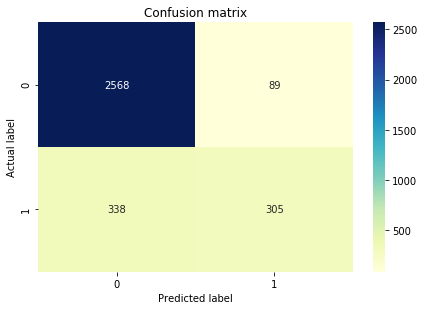

In [70]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,pred_rf_1)))

* **Currectly classified : 2871**
* **Wrong classified : 439**

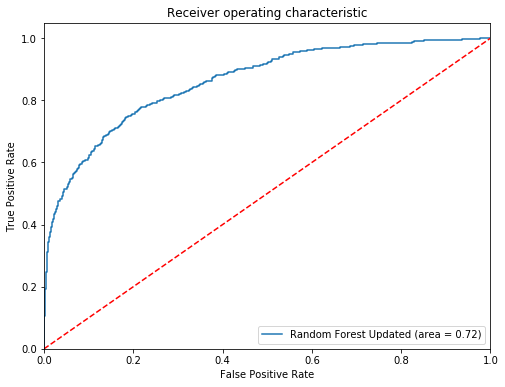

In [71]:
logit_roc_auc = roc_auc_score(y_test, pred_rf_1)
fpr, tpr, thresholds = roc_curve(y_test, clf_rf_1.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Random Forest Updated (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Updated model gives us better peformance then the default model**

In [72]:
from xgboost import XGBClassifier

In [73]:
clf_xgb, pred_xgb = Model(X=X_train,y=y_train,algorithm=XGBClassifier(),test=X_test)

In [74]:
model_evalution(y_test,pred_xgb)

Confusion Matrix : 
 [[2572   85]
 [ 350  293]]

Accuracy Score :  0.8681818181818182 

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2657
           1       0.78      0.46      0.57       643

    accuracy                           0.87      3300
   macro avg       0.83      0.71      0.75      3300
weighted avg       0.86      0.87      0.85      3300



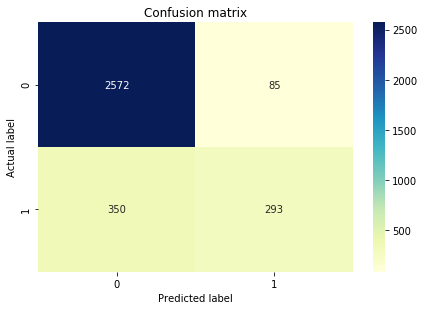

In [75]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,pred_xgb)))

* **Currectly classified : 2865**
* **Wrong classified : 435**

In [76]:
print("K-Fold Cross validation score : ",cross_val_score(estimator=clf_xgb,X=X_train,y=y_train,cv=10).mean())

K-Fold Cross validation score :  0.8562683980404062


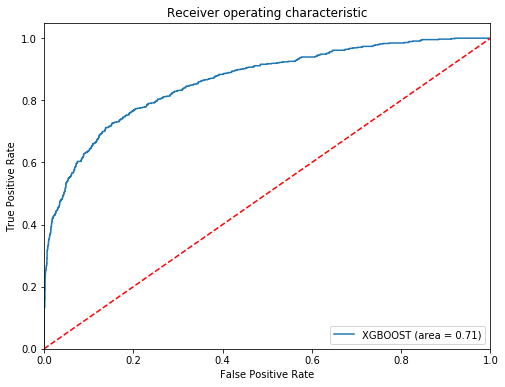

In [77]:
# Roc curve
logit_roc_auc = roc_auc_score(y_test, pred_xgb)
fpr, tpr, thresholds = roc_curve(y_test, clf_xgb.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='XGBOOST (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [78]:
param_xgb = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15,20,25],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [79]:
random_grid_search(x=X_train,y=y_train,classifier= XGBClassifier(),parameter=param_xgb,cv=10)

Random Grid search best accuracy score :  0.8585074626865672
Random Grid search best parameter :  {'min_child_weight': 7, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.4}


**Default model gives us better performance**

**Naive Bayes**

In [80]:
from sklearn.naive_bayes import GaussianNB

In [81]:
clf_nv,pred_nv=  Model(X=X_train,y=y_train,algorithm=GaussianNB(),test=X_test)

In [82]:
model_evalution(y_test,pred_nv)

Confusion Matrix : 
 [[2600   57]
 [ 474  169]]

Accuracy Score :  0.8390909090909091 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      2657
           1       0.75      0.26      0.39       643

    accuracy                           0.84      3300
   macro avg       0.80      0.62      0.65      3300
weighted avg       0.83      0.84      0.81      3300



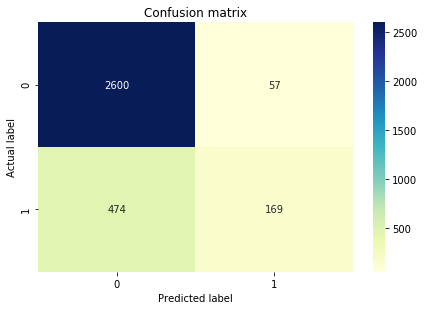

In [83]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,pred_nv)))

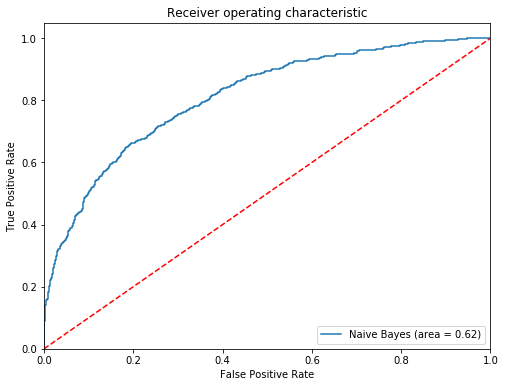

In [84]:
# Roc curve
logit_roc_auc = roc_auc_score(y_test, pred_nv)
fpr, tpr, thresholds = roc_curve(y_test, clf_nv.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**KNN**

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
clf_knn,pred_knn = Model(X=X_train,y=y_train,algorithm=KNeighborsClassifier(),test=X_test)

In [87]:
model_evalution(y_test,pred_knn)

Confusion Matrix : 
 [[2514  143]
 [ 400  243]]

Accuracy Score :  0.8354545454545454 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      2657
           1       0.63      0.38      0.47       643

    accuracy                           0.84      3300
   macro avg       0.75      0.66      0.69      3300
weighted avg       0.82      0.84      0.82      3300



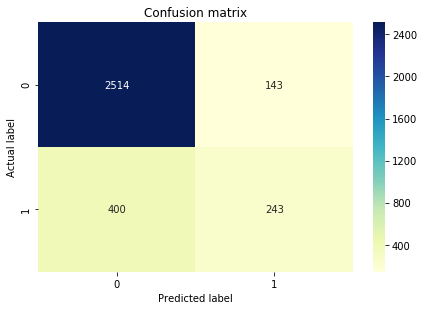

In [88]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,pred_knn)))

In [89]:
print("K-Fold Cross validation score : ",cross_val_score(estimator=clf_knn,X=X_train,y=y_train,cv=10).mean())

K-Fold Cross validation score :  0.8249281793368205


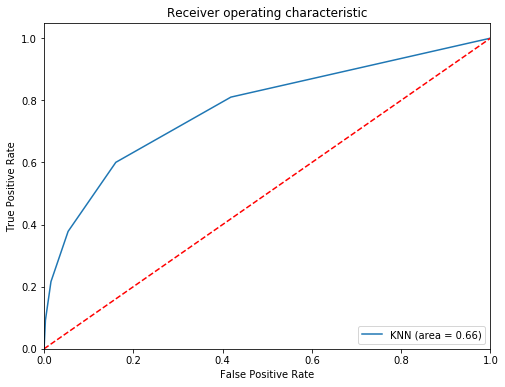

In [90]:
# Roc curve
logit_roc_auc = roc_auc_score(y_test, pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, clf_knn.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [91]:
param_knn = {'n_neighbors' : list(range(1,40)),
         'weights': ['uniform','distance'],
         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
         'leaf_size' : list(range(20,40)),
         'p' : [1,2]
    }

In [92]:
random_grid_search(x=X_train,y=y_train,classifier=clf_knn,parameter=param_knn,cv=10)

Random Grid search best accuracy score :  0.835820895522388
Random Grid search best parameter :  {'weights': 'uniform', 'p': 1, 'n_neighbors': 11, 'leaf_size': 30, 'algorithm': 'brute'}


In [93]:
updated_knn = KNeighborsClassifier(weights='distance',p=1,n_neighbors=10,leaf_size=23,algorithm='brute')

In [94]:
clf_knn_1,pred_knn_1 = Model(X=X_train,y=y_train,algorithm=updated_knn,test=X_test)

In [95]:
model_evalution(y_test,pred_knn_1)

Confusion Matrix : 
 [[2562   95]
 [ 416  227]]

Accuracy Score :  0.8451515151515151 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.96      0.91      2657
           1       0.70      0.35      0.47       643

    accuracy                           0.85      3300
   macro avg       0.78      0.66      0.69      3300
weighted avg       0.83      0.85      0.82      3300



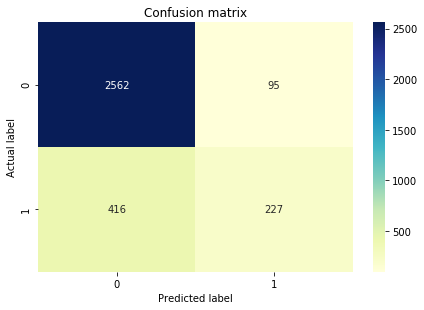

In [96]:
heatmap_cm(pd.DataFrame(confusion_matrix(y_test,pred_knn_1)))

* **Currectly classified : 2789**
* **Wrong classified : 521**

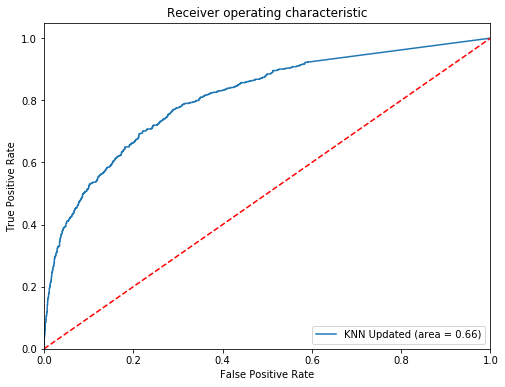

In [97]:
# Roc curve
logit_roc_auc = roc_auc_score(y_test, pred_knn_1)
fpr, tpr, thresholds = roc_curve(y_test, clf_knn_1.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='KNN Updated (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Updated Model gives us better result**

# Performance Measure Curve

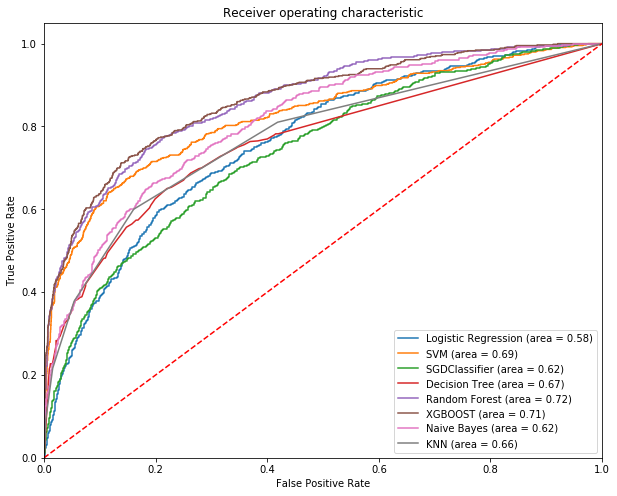

In [98]:
# Roc curve
plt.figure(figsize=(10,8))

# For Logistic Regression
roc_auc_lg = roc_auc_score(y_test, y_pred)
fpr_lg, tpr_lg, thresholds_sg = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.plot(fpr_lg, tpr_lg, label='Logistic Regression (area = %0.2f)' % roc_auc_lg)

# For SVM
roc_auc_svm = roc_auc_score(y_test, pred_svc)
fpr_sv, tpr_sv, thresholds_sv = roc_curve(y_test, clf_svc.predict_proba(X_test)[:,1])
plt.plot(fpr_sv, tpr_sv, label='SVM (area = %0.2f)' % roc_auc_svm)

# For SGDClassifier
roc_auc_sg = roc_auc_score(y_test, pred_sgd)
fpr_sg, tpr_sg, thresholds_sg = roc_curve(y_test, clf_sgd.predict_proba(X_test)[:,1])
plt.plot(fpr_sg, tpr_sg, label='SGDClassifier (area = %0.2f)' % roc_auc_sg)


# For Decision tree
roc_auc_tr = roc_auc_score(y_test, pred_tree_1)
fpr_tr, tpr_tr, thresholds_tr = roc_curve(y_test, clf_tree_1.predict_proba(X_test)[:,1])
plt.plot(fpr_tr, tpr_tr, label='Decision Tree (area = %0.2f)' % roc_auc_tr)

# For Random forest
roc_auc_rf = roc_auc_score(y_test, pred_rf_1)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, clf_rf_1.predict_proba(X_test)[:,1])
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf)

# For XGBOOST
roc_auc_xg = roc_auc_score(y_test, pred_xgb)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, clf_xgb.predict_proba(X_test)[:,1])
plt.plot(fpr_xg, tpr_xg, label='XGBOOST (area = %0.2f)' % roc_auc_xg)

# For Naive Bayes
roc_auc_nv = roc_auc_score(y_test, pred_nv)
fpr_nv, tpr_nv, thresholds_nv = roc_curve(y_test, clf_nv.predict_proba(X_test)[:,1])
plt.plot(fpr_nv, tpr_nv, label='Naive Bayes (area = %0.2f)' % roc_auc_nv)

# For KNN
roc_auc = roc_auc_score(y_test, pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, clf_knn.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % roc_auc)



plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Performance.png')
plt.show()

**In general this plot conclude that XGBOOST and Random Forest give us the better result.. If I have to choose one of them then it may be Random Forest. But, Model always choose accourding its business purpuse.**